In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
s = ct.tf('s')

G = (0.37/(s*((10*s)+1)))

G

TransferFunction(array([0.37]), array([10,  1,  0]))

In [3]:
C1 = (0.278*(s+0.1)/(s+0.14))

C1

TransferFunction(array([0.278 , 0.0278]), array([1.  , 0.14]))

In [4]:
C2 = (1.0009*(s+0.0001462)/(s+0.000001))

C2

TransferFunction(array([1.0009000e+00, 1.4633158e-04]), array([1.e+00, 1.e-06]))

mf1: {'RiseTime': 20.932591754491362, 'SettlingTime': 59.80740501283247, 'SettlingMin': 0.9059962628647689, 'SettlingMax': 1.0499607019030992, 'Overshoot': 4.99607019030992, 'Undershoot': 0, 'Peak': 1.0499607019030992, 'PeakTime': 42.861973592529935, 'SteadyStateValue': 1.0}
mf2: {'RiseTime': 18.865888118405856, 'SettlingTime': 66.0306084144205, 'SettlingMin': 0.953639621780668, 'SettlingMax': 1.0482055244067368, 'Overshoot': 4.8205524406736755, 'Undershoot': 0, 'Peak': 1.0482055244067368, 'PeakTime': 47.164720296014636, 'SteadyStateValue': 1.0}


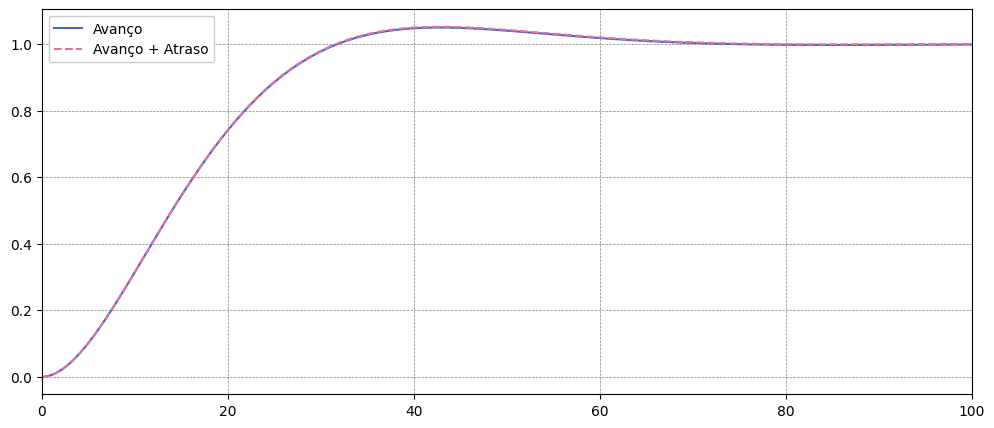

In [5]:
t = np.arange(0, 100, 1e-3)
mf1 = ct.feedback(C1*G)
print('mf1:', ct.step_info(mf1))
sol1 = ct.step_response(mf1, t)
mf2 = ct.feedback(C2*C1*G)
print('mf2:', ct.step_info(mf2))
sol2 = ct.step_response(mf2, t)
plt.figure()
plt.plot(sol1[0], sol1[1], label='Avanço')
plt.plot(sol2[0], sol2[1], linestyle='dashed', label='Avanço + Atraso')
plt.xlim(0,100)
plt.legend()
plt.show()

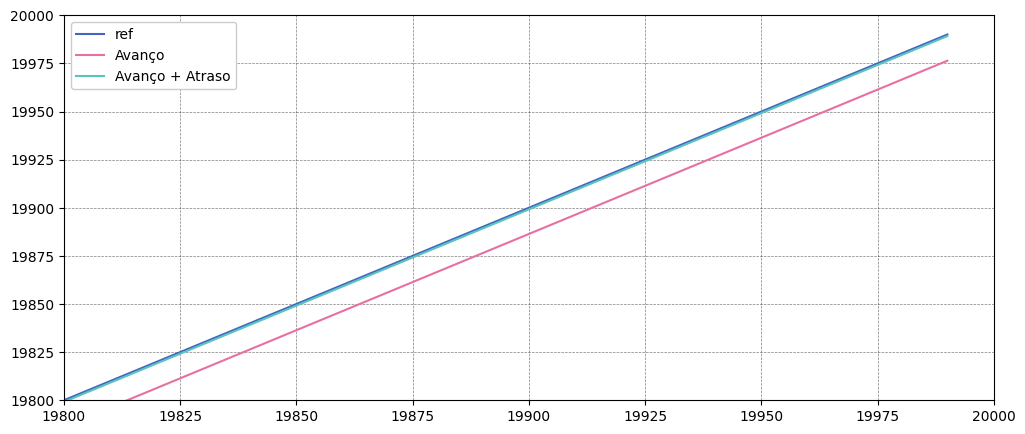

In [6]:
tf = 20000
t = np.arange(0, tf, 10)
u = np.ones(t.shape)

_,y1 = ct.forced_response((1/s)*G, t, u)
_,y2 = ct.forced_response((1/s)*mf1, t, u)
_,y3 = ct.forced_response((1/s)*mf2, t, u)

plt.figure()
plt.plot(t, t, label='ref')
#plt.plot(t, y1, label='Malha Aberta')
plt.plot(t, y2, label='Avanço')
plt.plot(t, y3, label='Avanço + Atraso')
plt.ylim(tf-200, tf)
plt.xlim(tf-200, tf)
plt.legend()
plt.show()